In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
(train_image, train_lable), (test_image, test_lable) = keras.datasets.fashion_mnist.load_data()
train_image = train_image.reshape(train_image.shape[0], 28, 28, 1)
test_image = test_image.reshape(test_image.shape[0], 28, 28, 1)
train_image = train_image/255
test_image = test_image/255
train_lable_onehot = keras.utils.to_categorical(train_lable)
test_lable_onehot = keras.utils.to_categorical(test_lable)

In [36]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32,
                              kernel_size=5,
                              strides=1,
                              padding='same',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=2,
                                    strides=2))
model.add(keras.layers.Conv2D(filters=48,
                              kernel_size=5,
                              strides=1))
model.add(keras.layers.MaxPooling2D(pool_size=2,
                                    strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 120)               144120    
_________________________________________________________________
dropout_13 (Dropout)         (None, 120)             

In [37]:
model.compile(optimizer=keras.optimizers.Adam(0.002),
             loss='categorical_crossentropy',#用于连续编码而非one hot编码的情况
             metrics=['acc'] 
)
history = model.fit(train_image, train_lable_onehot,
                    batch_size=128,
                    epochs=5,
                    validation_data=(test_image, test_lable_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 40s 666us/sample - loss: 0.6159 - acc: 0.7819 - val_loss: 0.3694 - val_acc: 0.8658
Epoch 2/5
60000/60000 [==============================] - 38s 629us/sample - loss: 0.3973 - acc: 0.8599 - val_loss: 0.3221 - val_acc: 0.8785
Epoch 3/5
60000/60000 [==============================] - 38s 630us/sample - loss: 0.3514 - acc: 0.8741 - val_loss: 0.3058 - val_acc: 0.8896
Epoch 4/5
60000/60000 [==============================] - 38s 629us/sample - loss: 0.3214 - acc: 0.8850 - val_loss: 0.2907 - val_acc: 0.8925
Epoch 5/5
60000/60000 [==============================] - 38s 629us/sample - loss: 0.3020 - acc: 0.8924 - val_loss: 0.2829 - val_acc: 0.8967


In [33]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

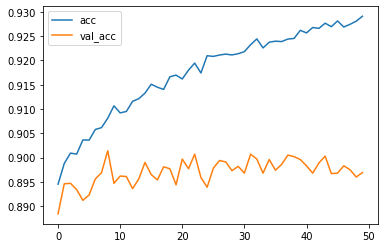

In [34]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

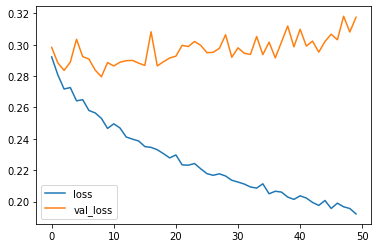

In [35]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

In [24]:
model.evaluate(test_image, test_lable_onehot)

10000/10000 [==============================] - 4s 360us/sample - loss: 1.6866 - acc: 0.5466


[1.6865822015762328, 0.5466]